<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab09_Matrices_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
import numpy as np
import sympy
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Matrices

1. **Modelo de encriptación**

Un proceso para encriptar un mensaje secreto es usar cierta matrix cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc y espacio=27), se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamaño de la matriz de código, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje.

La persona que debe recibir el mensaje conoce la matriz de código. El o ella arrglan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el número de elementos en una fila conicide con el tamaño de la matriz de código multiplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588,

la primera fila del mensaje es 47,49,-19,257,487

¿Cual es el mensaje?



In [85]:
# Arreglar los números de izquierda a derecha en cada fila

M = np.array([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])

In [86]:
M1 = np.array([[47,49,-19,257,487],
                  [10,-9,63,137,236],
                  [79,142,-184,372,536],
                  [59,70,-40,332,588]])

In [243]:
INV= inv(M)
INV

array([[ 14.,   1.,  -2.,   1.,  -5.],
       [ 22.,  -7.,  -4.,   6., -19.],
       [ 13.,  -3.,  -2.,   3., -10.],
       [ -2.,   1.,   1.,  -1.,   2.],
       [ -2.,  -0.,  -0.,  -0.,   1.]])

In [88]:
# Se multiplica esa matriz por la matriz de código por la derecha

mensaje= np.dot(M1,INV).round().astype(int)
mensaje

array([[ 1, 18,  5, 27, 25],
       [15, 21, 27,  8,  1],
       [22,  9, 14,  7, 27],
       [ 6, 21, 14, 27, 27]])

In [174]:
abecedario = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', ' ']

In [238]:
def cifrado (M):
  texto=""
  for fila in M: # Toda la matriz
    for valor in fila: # Todos los elementos de la matriz
        for posicion, letra in enumerate(abecedario):
            if valor == 1 + posicion:
              texto+= letra
  return texto

In [239]:
cifrado(mensaje)

'ARE YOU HAVING FUN  '

2. Operaciones matricial con regresión lineal.

Cuando se desea hacer una regresión lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y miniminzar el conjunto de parámetros de la regresión emplando algún metodo de minimización, otra forma es encontrar la expresión analítica en forma matricial, para determinar el conjunto de parámetros de la regresión. En este último caso, la regresión lineal viene dada por la siguiente expresion generalizada:


- $\Theta = (X^T X)^{-1} X^T y$

donte $\Theta$ es la matriz de parametros asociados a la regresión lineal, X la matriz de características y $y$ los valos esperados, así, si tenemos una conjunto de datos en N dimensiones; la recta, plano o hyperplano puede ser calculado como:

$Y=\Theta^T X$


En el caso de dos dimensiones, supongamos que X, y Y presentan un comportamiento lineal, y vienen dados por ( En este caso el super indice es :


- Sea $\vec{X}=x^{(1)}, x^{(2)}, x^{(3)}, x^{(4)}, ..., x^{(m)}$
- Sea $\vec{Y}=y^{(1)}, y^{(2)}, y^{(3)}, y^{(4)}, ..., y^{(m)}$

Para determinar la ecuación de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{(i)} = \theta_1 x^{(i)} + \theta_0$ la anterior expresión puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

- $\Theta = (X^T X)^{-1} X^T y$

donde:
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{(1)} \\
1 & x_1^{(2)} \\
\vdots & \vdots \\
1 & x_1^{(m)}
\end{bmatrix}
\end{equation}

y


\begin{equation}
y=
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots\\
y^{(m)}
\end{bmatrix}
\end{equation}

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos:
```python
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```



Generalice para el siguiente problema bidimensional:


```python
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")
```


# **Unidemensional**

In [245]:
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise

In [289]:
X= np.array(((np.ones(len(x1))),
            (x1)))
X

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
         5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ]])

In [299]:
X_T= X.T # vector
X_T

array([[ 1.        ,  0.        ],
       [ 1.        ,  1.11111111],
       [ 1.        ,  2.22222222],
       [ 1.        ,  3.33333333],
       [ 1.        ,  4.44444444],
       [ 1.        ,  5.55555556],
       [ 1.        ,  6.66666667],
       [ 1.        ,  7.77777778],
       [ 1.        ,  8.88888889],
       [ 1.        , 10.        ]])

In [325]:
# Matriz de theta

TH = inv(np.dot(X,X_T))
TH_1= np.dot(TH,X)
TH_2= np.dot(TH_1,y)
TH_2

array([0.01629387, 0.93145019])

In [365]:
inv(X @ X_T)@ X @ y # verificar

array([0.01629387, 0.93145019])

In [335]:
# Recta

Y= np.dot(TH_2,X)
Y

array([0.01629387, 1.05123853, 2.08618319, 3.12112784, 4.1560725 ,
       5.19101716, 6.22596182, 7.26090648, 8.29585113, 9.33079579])

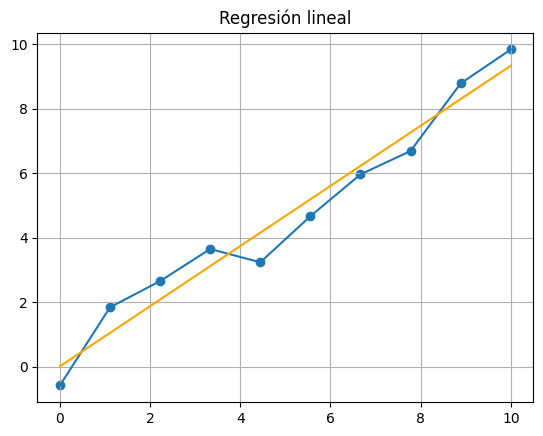

In [375]:
# Gráfica

plt.plot(x1,y)
plt.scatter(x1,y)
plt.plot(x1,Y,c="orange")
plt.title("Regresión lineal")
plt.grid()

# **Bidimensional**

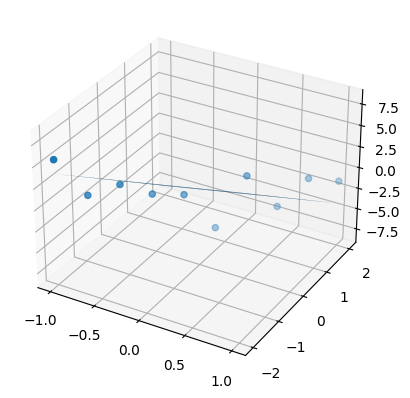

In [395]:
N = 10
x1_ = np.linspace(-1, 1, N)
x2_ = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y_ = 2*(x1_+noise1) - 3*(x2_+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1_,x2_)
Y_ = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y_)
scatter = ax.scatter(x1_, x2_, y_,"-")

In [417]:
X1= np.array(((np.ones(len(x1_))),
             (x1_)))
X1

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
         0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ]])

In [383]:
X2= np.array(((np.ones(len(x2_))),
             (x2_)))
X2

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-2.        , -1.55555556, -1.11111111, -0.66666667, -0.22222222,
         0.22222222,  0.66666667,  1.11111111,  1.55555556,  2.        ]])

In [418]:
uno= np.linalg.pinv(X1 @ X1.T) @ X1 @ y_

In [419]:
dos= np.linalg.pinv(X2 @ X2.T) @ X2 @ y_

In [420]:
# Ecuaciones

Y_1= uno @ X1

Y_2= dos @ X2

In [432]:
Y_n= Y_1+Y_2 # intersección de dos planos que da recta de la regresión lineal
Y_n

array([ 2.53627875,  1.92323742,  1.31019609,  0.69715476,  0.08411343,
       -0.52892789, -1.14196922, -1.75501055, -2.36805188, -2.98109321])

Text(0.5, 0.92, 'Regresion lineal bidimensional')

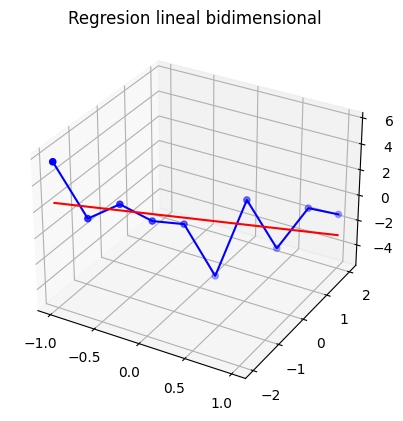

In [443]:
# Gráfica en el espacio

X1, X2 = np.meshgrid(x1_,x2_)
Y_ = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#surf = ax.plot_surface(X1, X2, Y_)
scatter = ax.scatter(x1_, x2_, y_,c="b")
plot= ax.plot(x1_, x2_, y_,c="b")
plot= ax.plot(x1_,x2_,Y_n,c="r")
plt.title("Regresion lineal bidimensional")